In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mlxtend.frequent_patterns.apriori as ap
import mlxtend.frequent_patterns.association_rules as ar
df = pd.read_csv('transaksib.csv',index_col="TRX_ID",parse_dates=["TRX_TS"])

C:\Users\wilsen\AppData\Local\Temp\ipykernel_11772\1405945320.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('transaksib.csv',index_col="TRX_ID",parse_dates=["TRX_TS"])


In [40]:
df

,TRX_TS,PRODUCT_ID,PRODUCT_NAME,SALES
TRX_ID,,,,
85,05/31/17 21.14,263,Cappuccino,34000
85,05/31/17 21.14,227,Kopi Tubruk,44000
85,05/31/17 21.14,268,Macchiato,26000
85,05/31/17 21.14,268,Macchiato,26000
85,05/31/17 21.14,268,Macchiato,26000
...,...,...,...,...
8850,08/30/19 19.03,233,Rawon,36000
8851,08/26/19 13.28,236,Nasi Putih,7000
8851,08/30/19 19.03,233,Rawon,36000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30503 entries, 85 to 8852
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   TRX_TS        30503 non-null  object
 1   PRODUCT_ID    30503 non-null  int64 
 2   PRODUCT_NAME  30503 non-null  object
 3   SALES         30503 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.2+ MB


In [42]:
df.index

Index([  85,   85,   85,   85,   85,   85,   85,   85,   86,   86,
       ...
       8848, 8848, 8849, 8849, 8850, 8850, 8851, 8851, 8852, 8852],
      dtype='int64', name='TRX_ID', length=30503)

In [43]:
df["PRODUCT_NAME"].value_counts().sort_values(ascending=False)

PRODUCT_NAME
Teh Tubruk                     4677
Mineral Water                  2736
Pisang Goreng                  2206
Nasi Putih                     2016
Nasi Goreng Jawa               1810
Kopi Tubruk                    1799
Soto Ayam                      1758
Extra Kerupuk Putih            1567
Rawon                          1441
Bakmi Godog Keju               1415
Bakmi Goreng Jawa              1184
Fresh Orange Juice             1163
Latte                          1077
Teh Tarik                       957
Roti Bakar                      854
Cappuccino                      811
Macchiato                       634
Hot/Ice Lemon Tea               599
Americano                       506
French Fries                    486
Spaghetti Bolognese             303
Espresso                        111
Macchiato                       100
Iced Tea                         87
Milo Dinosaur                    43
Bakwan Goreng                    32
Double Espresso                  22
Hot Chocolate  

In [44]:
df2 = df.groupby("PRODUCT_NAME").sum()
df2

,TRX_TS,PRODUCT_ID,SALES
PRODUCT_NAME,,,
Americano,06/05/17 14.2606/06/17 15.0306/19/17 13.0606/2...,135421,14673000
Bakmi Godog Keju,06/03/17 08.4706/05/17 13.5006/05/17 13.5006/0...,322565,42296000
Bakmi Goreng Jawa,06/03/17 08.3606/03/17 08.0806/05/17 14.1606/0...,272522,42826000
Bakwan Goreng,10/26/18 11.3511/21/18 11.4801/21/19 21.3901/2...,12896,832000
Cappuccino,05/31/17 21.1406/03/17 07.4106/03/17 08.5806/0...,243353,25699000
Double Espresso,09/09/17 18.4909/20/17 18.2212/21/17 14.3812/2...,5742,616000
Es Batu,05/30/19 19.5306/30/19 13.1307/15/19 13.5507/2...,2485,10000
Es Teh Susu (Gula Jawa),10/04/17 14.2810/15/17 21.5010/20/17 13.3710/2...,1635,120000
Espresso,06/05/17 13.3206/05/17 14.2906/05/17 14.5806/0...,31868,2030000


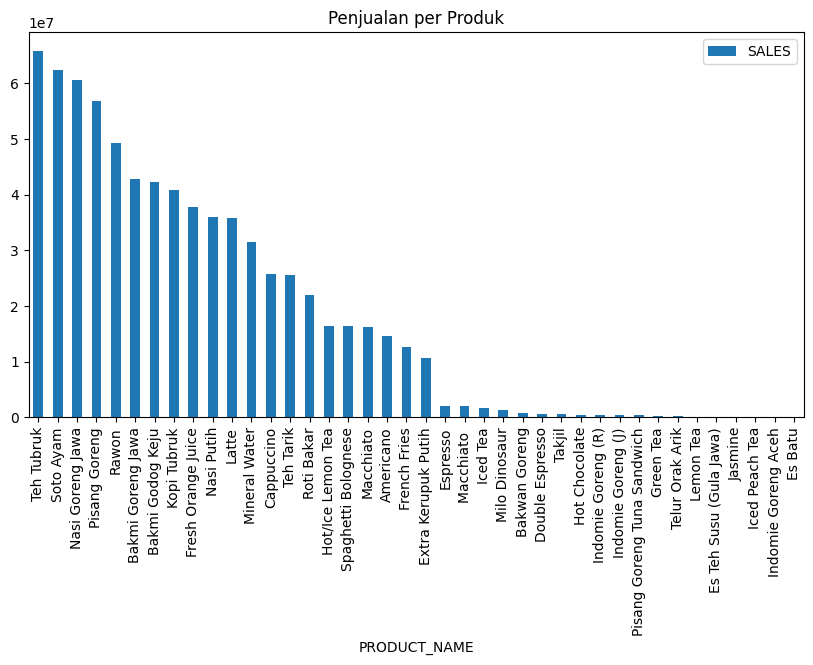

In [45]:
df2.sort_values(by="SALES",ascending=False).plot(kind="bar",y="SALES",figsize=(10,5))
plt.title("Penjualan per Produk")
plt.show()

In [46]:
dfHotEncoder = df.pivot_table(index="TRX_ID",columns="PRODUCT_NAME",values="SALES")

In [47]:
dfHotEncoder

PRODUCT_NAME,Americano,Bakmi Godog Keju,Bakmi Goreng Jawa,Bakwan Goreng,Cappuccino,Double Espresso,Es Batu,Es Teh Susu (Gula Jawa),Espresso,Extra Kerupuk Putih,...,Pisang Goreng,Pisang Goreng Tuna Sandwich,Rawon,Roti Bakar,Soto Ayam,Spaghetti Bolognese,Takjil,Teh Tarik,Teh Tubruk,Telur Orak Arik
TRX_ID,,,,,,,,,,,,,,,,,,,,,
85,NaN,NaN,NaN,NaN,34000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,36000.0,NaN,48000.0,NaN,NaN,NaN,NaN,NaN
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,48000.0,NaN,NaN,NaN,NaN,NaN
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,48000.0,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,34000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,22000.0,NaN,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6000.0,...,NaN,NaN,NaN,NaN,35000.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,36000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,36000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,36000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
dfHotEncoder.shape 

(8144, 40)

In [49]:
dfHotEncoder = dfHotEncoder.fillna(0)

In [50]:
dfHotEncoder

PRODUCT_NAME,Americano,Bakmi Godog Keju,Bakmi Goreng Jawa,Bakwan Goreng,Cappuccino,Double Espresso,Es Batu,Es Teh Susu (Gula Jawa),Espresso,Extra Kerupuk Putih,...,Pisang Goreng,Pisang Goreng Tuna Sandwich,Rawon,Roti Bakar,Soto Ayam,Spaghetti Bolognese,Takjil,Teh Tarik,Teh Tubruk,Telur Orak Arik
TRX_ID,,,,,,,,,,,,,,,,,,,,,
85,0.0,0.0,0.0,0.0,34000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,36000.0,0.0,48000.0,0.0,0.0,0.0,0.0,0.0
86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,48000.0,0.0,0.0,0.0,0.0,0.0
87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,48000.0,0.0,0.0,0.0,0.0,0.0
88,0.0,0.0,0.0,0.0,34000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,22000.0,0.0,0.0,0.0,0.0,0.0,0.0
89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6000.0,...,0.0,0.0,0.0,0.0,35000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,36000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,36000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,36000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
dfHotEncoder

PRODUCT_NAME,Americano,Bakmi Godog Keju,Bakmi Goreng Jawa,Bakwan Goreng,Cappuccino,Double Espresso,Es Batu,Es Teh Susu (Gula Jawa),Espresso,Extra Kerupuk Putih,...,Pisang Goreng,Pisang Goreng Tuna Sandwich,Rawon,Roti Bakar,Soto Ayam,Spaghetti Bolognese,Takjil,Teh Tarik,Teh Tubruk,Telur Orak Arik
TRX_ID,,,,,,,,,,,,,,,,,,,,,
85,0.0,0.0,0.0,0.0,34000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,36000.0,0.0,48000.0,0.0,0.0,0.0,0.0,0.0
86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,48000.0,0.0,0.0,0.0,0.0,0.0
87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,48000.0,0.0,0.0,0.0,0.0,0.0
88,0.0,0.0,0.0,0.0,34000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,22000.0,0.0,0.0,0.0,0.0,0.0,0.0
89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6000.0,...,0.0,0.0,0.0,0.0,35000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,36000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,36000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,36000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
dfHotEncoder[dfHotEncoder > 0] = 1

In [53]:
sdf = dfHotEncoder.astype(pd.SparseDtype(int))


In [54]:
sdf.dtypes

PRODUCT_NAME
Americano                      Sparse[int64, 0]
Bakmi Godog Keju               Sparse[int64, 0]
Bakmi Goreng Jawa              Sparse[int64, 0]
Bakwan Goreng                  Sparse[int64, 0]
Cappuccino                     Sparse[int64, 0]
Double Espresso                Sparse[int64, 0]
Es Batu                        Sparse[int64, 0]
Es Teh Susu (Gula Jawa)        Sparse[int64, 0]
Espresso                       Sparse[int64, 0]
Extra Kerupuk Putih            Sparse[int64, 0]
French Fries                   Sparse[int64, 0]
Fresh Orange Juice             Sparse[int64, 0]
Green Tea                      Sparse[int64, 0]
Hot Chocolate                  Sparse[int64, 0]
Hot/Ice Lemon Tea              Sparse[int64, 0]
Iced Peach Tea                 Sparse[int64, 0]
Iced Tea                       Sparse[int64, 0]
Indomie Goreng (J)             Sparse[int64, 0]
Indomie Goreng (R)             Sparse[int64, 0]
Indomie Goreng Aceh            Sparse[int64, 0]
Jasmine                    

In [55]:
df3 = ap(sdf, min_support=0.1, use_colnames=True)
df3

C:\Users\wilsen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.131508,(Bakmi Godog Keju)
1,0.111370,(Bakmi Goreng Jawa)
2,0.129912,(Extra Kerupuk Putih)
3,0.111616,(Fresh Orange Juice)
4,0.177554,(Kopi Tubruk)
5,0.109283,(Latte)
6,0.224705,(Mineral Water)
7,0.170309,(Nasi Goreng Jawa)
8,0.196832,(Nasi Putih)
9,0.206655,(Pisang Goreng)


In [58]:
df4 = ar(df3, metric="lift", min_threshold=1)
df4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Nasi Goreng Jawa),(Mineral Water),0.170309,0.224705,0.104003,0.610671,2.717651,1.0,0.065734,1.991359,0.761772,0.357384,0.497830,0.536756
1,(Mineral Water),(Nasi Goreng Jawa),0.224705,0.170309,0.104003,0.462842,2.717651,1.0,0.065734,1.544592,0.815219,0.357384,0.352580,0.536756
2,(Teh Tubruk),(Mineral Water),0.342829,0.224705,0.101793,0.296920,1.321374,1.0,0.024757,1.102712,0.370089,0.218561,0.093145,0.374963
3,(Mineral Water),(Teh Tubruk),0.224705,0.342829,0.101793,0.453005,1.321374,1.0,0.024757,1.201421,0.313703,0.218561,0.167653,0.374963
4,(Teh Tubruk),(Pisang Goreng),0.342829,0.206655,0.122667,0.357808,1.731425,1.0,0.051820,1.235370,0.642818,0.287399,0.190526,0.475695
5,(Pisang Goreng),(Teh Tubruk),0.206655,0.342829,0.122667,0.593583,1.731425,1.0,0.051820,1.616986,0.532481,0.287399,0.381566,0.475695


In [60]:
df4.sort_values(by=["support","lift","confidence"],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
5,(Pisang Goreng),(Teh Tubruk),0.206655,0.342829,0.122667,0.593583,1.731425,1.0,0.051820,1.616986,0.532481,0.287399,0.381566,0.475695
4,(Teh Tubruk),(Pisang Goreng),0.342829,0.206655,0.122667,0.357808,1.731425,1.0,0.051820,1.235370,0.642818,0.287399,0.190526,0.475695
0,(Nasi Goreng Jawa),(Mineral Water),0.170309,0.224705,0.104003,0.610671,2.717651,1.0,0.065734,1.991359,0.761772,0.357384,0.497830,0.536756
1,(Mineral Water),(Nasi Goreng Jawa),0.224705,0.170309,0.104003,0.462842,2.717651,1.0,0.065734,1.544592,0.815219,0.357384,0.352580,0.536756
2,(Teh Tubruk),(Mineral Water),0.342829,0.224705,0.101793,0.296920,1.321374,1.0,0.024757,1.102712,0.370089,0.218561,0.093145,0.374963
3,(Mineral Water),(Teh Tubruk),0.224705,0.342829,0.101793,0.453005,1.321374,1.0,0.024757,1.201421,0.313703,0.218561,0.167653,0.374963
